#  SyriaTel Customer Churn

## Bussiness understanding

Customer churn is one of the most pressing challenges for telecommunications companies, as retaining existing customers is significantly more cost-effective than acquiring new ones. SyriaTel, like many telecom providers, experiences a steady loss of customers who discontinue their services.   

SyriaTel, a telecom provider, wants to understand **which customers are most likely to churn** and **what factors contribute to churn**. By predicting churn early, the company can design retention strategies such as personalized offers, improved customer service, or plan adjustments to reduce customer loss.  

#### Stakeholders  
- **SyriaTel Management:** Interested in reducing churn rates to improve profitability.  
- **Customer Retention Team:** Needs insights to design effective interventions for at-risk customers.  

The key question is:  
 *“Can we predict which customers are likely to churn, and what behaviors signal higher churn risk?”*  
---

### Problem statement

Currently, SyriaTel lacks a reliable method to **predict which customers are at risk of leaving**. Without such a system, the company cannot take proactive steps to retain customers, leading to revenue loss and reduced market competitiveness.  


### Goals and objectives

---
#### Goal  
The primary goal of this project is to develop a **machine learning classification model** that predicts whether a customer will churn, enabling SyriaTel to take proactive actions that reduce churn and improve profitability. 

---

#### Objectives  

---
To achieve this goal, the project will:  
1. **Build predictive models** using customer account details, usage behavior, and service interactions.  
2. **Identify key factors** that contribute most to churn, such as call usage, international plans, and customer service calls. 
3. **Evaluate model performance** using appropriate classification metrics (e.g., accuracy, precision, recall, F1-score).  
4. **Provide actionable recommendations** for SyriaTel’s customer retention strategies based on model insights.  


### Metric of success

To add

## 2: Data Undestanding

### 2.1: Data Overview 

The dataset used in this analysis is sourced from the **SyriaTel Customer Churn Dataset** on [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). It contains information on **3,333 customers** of SyriaTel, a telecommunications company.  The dataset is designed for a **binary classification problem** with the **Target variable:** `churn` (whether a customer left the company — `True`/`False`).  

The core of the dataset is customer account details, usage behavior (calls, minutes, charges), and interactions with customer service. Together, these variables enable robust analysis of churn drivers and prediction.  

---

#### Column Name Meanings  

| Column Name              | Meaning                                                                 |
|--------------------------|-------------------------------------------------------------------------|
| `state`                  | The U.S. state the customer resides in.                                 |
| `account length`         | Number of days the account has been active.                             |
| `area code`              | Customer’s assigned telephone area code.                                |
| `phone number`           | Customer’s phone number (unique identifier).            |
| `international plan`     | Whether the customer has an international calling plan (`yes`/`no`).    |
| `voice mail plan`        | Whether the customer has a voicemail plan (`yes`/`no`).                 |
| `number vmail messages`  | Number of voicemail messages recorded.                                  |
| `total day minutes`      | Total number of minutes of calls made during the day.                   |
| `total day calls`        | Total number of calls made during the day.                              |
| `total day charge`       | Total charges for daytime calls.                                        |
| `total eve minutes`      | Total minutes of evening calls.                                         |
| `total eve calls`        | Total number of evening calls.                                          |
| `total eve charge`       | Total charges for evening calls.                                        |
| `total night minutes`    | Total minutes of night calls.                                           |
| `total night calls`      | Total number of night calls.                                            |
| `total night charge`     | Total charges for night calls.                                          |
| `total intl minutes`     | Total minutes of international calls.                                   |
| `total intl calls`       | Total number of international calls.                                    |
| `total intl charge`      | Total charges for international calls.                                  |
| `customer service calls` | Number of calls made to customer service.                               |
| `churn`                  | **Target variable**: Whether the customer has churned (`True`/`False`). |


### 2.2: Data Description

#### 2.2.1: Importing the dataset

In [1]:
#importing the necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")
import re

In [2]:
#Reading the dataset and checking top five rows and last five rows
data = pd.read_csv('original_data/churn_telecom.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### 2.2.2: Basic Structure

In [3]:
#data shape
data.shape

(3333, 21)

In [4]:
#column names
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

#### 2.2.3: Overview of column types and non-null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### 2.2.4: Summary statistics numerical

In [6]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


#### 2.2.5: Summary statistics categorical

In [7]:
data.describe(include='O')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


#### 2.2.6: Missing values

In [8]:
data.isna().mean()*100

state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

#### 2.2.7: Duplicates

In [9]:
data.duplicated().sum()

0

### 2.3: Data Summary
---

The dataset consists of **3,333 customer records** with **21 attributes `[16 numeric, 4 categorical and 1 boolean]`**, capturing demographic details, account information, service usage, and churn status (whether a customer left or not). Features include customer state, account length, area code, subscription plans (international and voicemail), usage metrics (day, evening, night, international minutes/calls/charges), number of customer service calls, and the binary target variable `churn`.  

---

Numerical summaries show that customers, on average, have an account length of about **101 days**, make around **100 calls per time period (day/evening/night)**, and use approximately **180–200 minutes daily**. International usage is relatively low with a mean equal to 10 minutes and 4 to 5 calls, while the average number of customer service calls is **1.6**, with some customers contacting up to **9 times**.  

---

Categorical summaries reveal that most customers do not subscribe to an international plan (**~90% "no"**) or voicemail plan (**~72% "no"**). The dataset covers customers across **51 U.S. states**, but each phone number is unique, making it unsuitable as a predictive feature.  

---

The target variable `churn` is imbalanced: **14.5% of customers churned (483 records)**, while **85.5% did not churn (2,850 records)**. This imbalance is important to consider when training classification models, as it may bias predictions toward the majority class.  

---

The dataset contains **no missing values** or duplicates, making it clean and ready for modeling. This is highly relevant for our churn analysis, as it ensures the model can fully leverage all historical usage and interaction records without significant preprocessing.  

---

Overall, the dataset provides a balanced mix of **service usage, subscription plan details, and customer interaction features**, which are directly relevant for predicting churn and identifying factors that drive customer retention.  

---

## 3: Data Preparation

### 3.1: Data Cleaning

#### 3.1.1: Making a copy of the data

In [10]:
#copy 
df = data.copy()
df.shape

(3333, 21)

#### 3.1.2: Dropping unpredictive column(s)

In [11]:
df.drop(columns=['phone number'], inplace=True)
df.shape

(3333, 20)

**The decision to drop `phone number` column is because it contains unique identifiers for each customer and does not provide any meaningful information for predicting churn. keeping it would lead to aspects such as overfitting**

#### 3.1.3: Formating column names

In [12]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [13]:
#creating mapper
col_map = {
    'state': 'state',
    'account length': 'acc_length',
    'area code': 'area_code',
    'international plan': 'intl_plan',
    'voice mail plan': 'vmail_plan',
    'number vmail messages': 'num_vm_msgs',
    'total day minutes': 'ttl_day_mins',
    'total day calls': 'ttl_day_calls',
    'total day charge': 'ttl_day_charge',
    'total eve minutes': 'ttl_eve_mins',
    'total eve calls': 'ttl_eve_calls',
    'total eve charge': 'ttl_eve_charge',
    'total night minutes': 'ttl_ngt_mins',
    'total night calls': 'ttl_ngt_calls',
    'total night charge': 'ttl_ngt_charge',
    'total intl minutes': 'ttl_intl_mins',
    'total intl calls': 'ttl_intl_calls',
    'total intl charge': 'ttl_intl_charge',
    'customer service calls': 'cust_service_calls',
    'churn': 'churn'
}

# Applying mapping
df.rename(columns=col_map, inplace=True)
df.columns

Index(['state', 'acc_length', 'area_code', 'intl_plan', 'vmail_plan',
       'num_vm_msgs', 'ttl_day_mins', 'ttl_day_calls', 'ttl_day_charge',
       'ttl_eve_mins', 'ttl_eve_calls', 'ttl_eve_charge', 'ttl_ngt_mins',
       'ttl_ngt_calls', 'ttl_ngt_charge', 'ttl_intl_mins', 'ttl_intl_calls',
       'ttl_intl_charge', 'cust_service_calls', 'churn'],
      dtype='object')

#### 3.1.4: Checking Unique Items

In [14]:
for col in df.columns:
    print(f"Unique items in {col}:\n")
    print(df[col].unique())
    print("***********")

Unique items in state:

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
***********
Unique items in acc_length:

[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  

#### 3.1.5: Changing Datatype to object

In [15]:
df["churn"] = df["churn"].map({True: "Churned", False: "Not Churned"})

In [16]:
df['area_code'] = df['area_code'].astype(str)

- **churn**: Converted from boolean (`True/False`) to categorical strings `"Churned"` and `"Not Churned"`).This makes the column more interpretable for humans and avoids plotting errors.  

- **area_code**: Converted from numeric to string because it represents a **categorical label** rather than a quantitative value. Treating it as a string prevents meaningless arithmetic operations and ensures proper handling during **EDA** and **modeling**.  


#### 3.1.6: Checking for Outliers

In [17]:
#storing numeric columns
num_cols = df.select_dtypes(include='number')

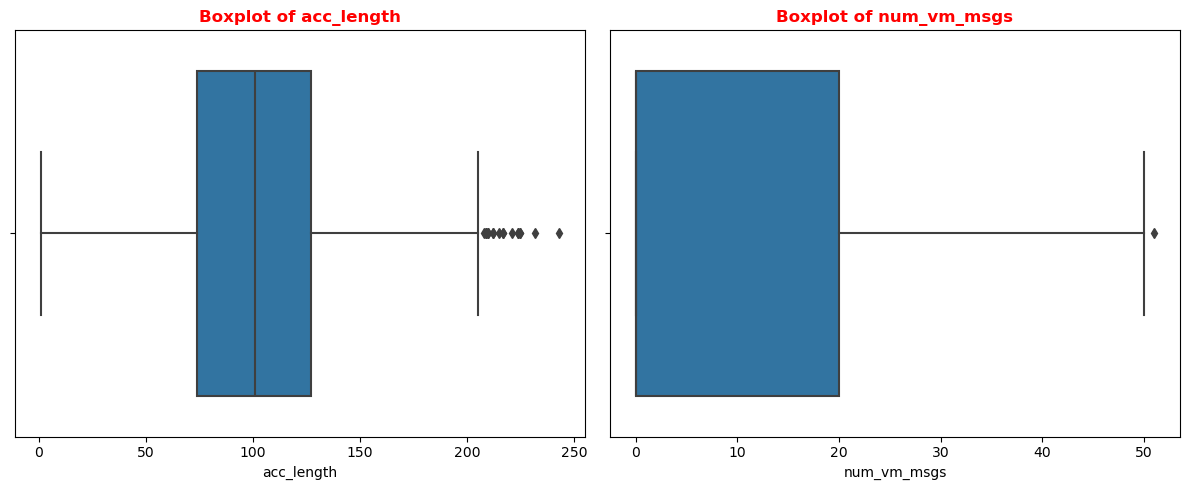

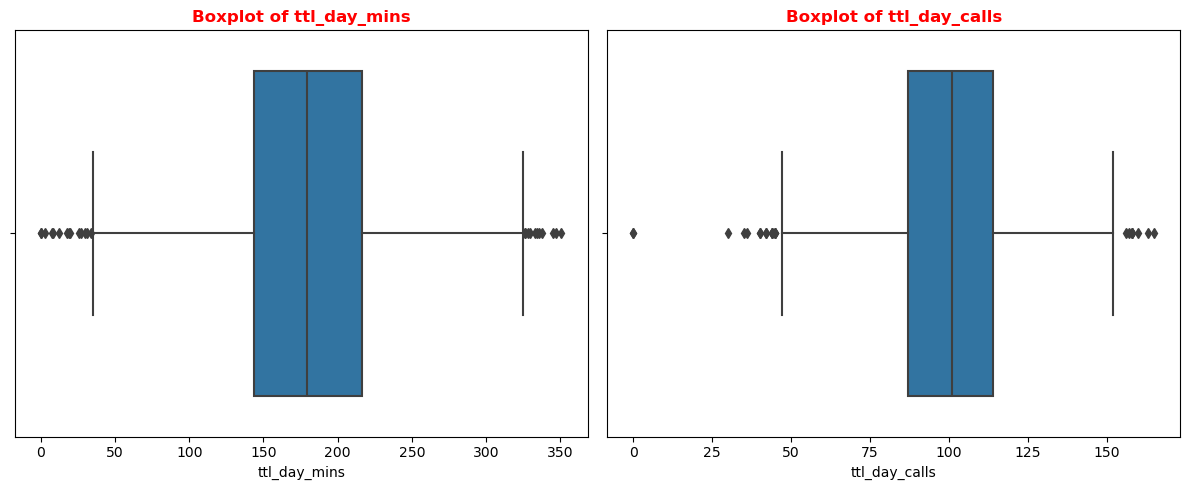

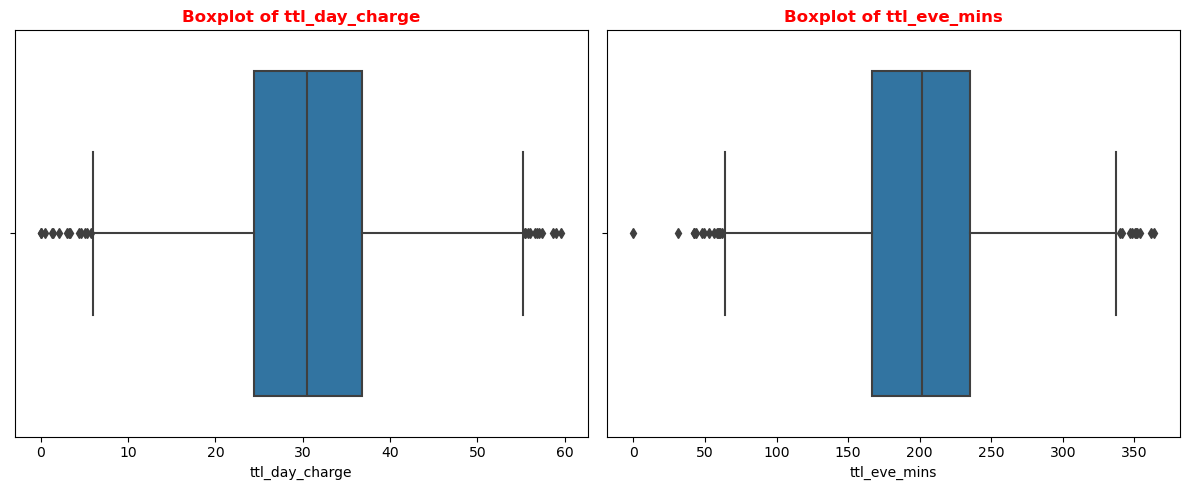

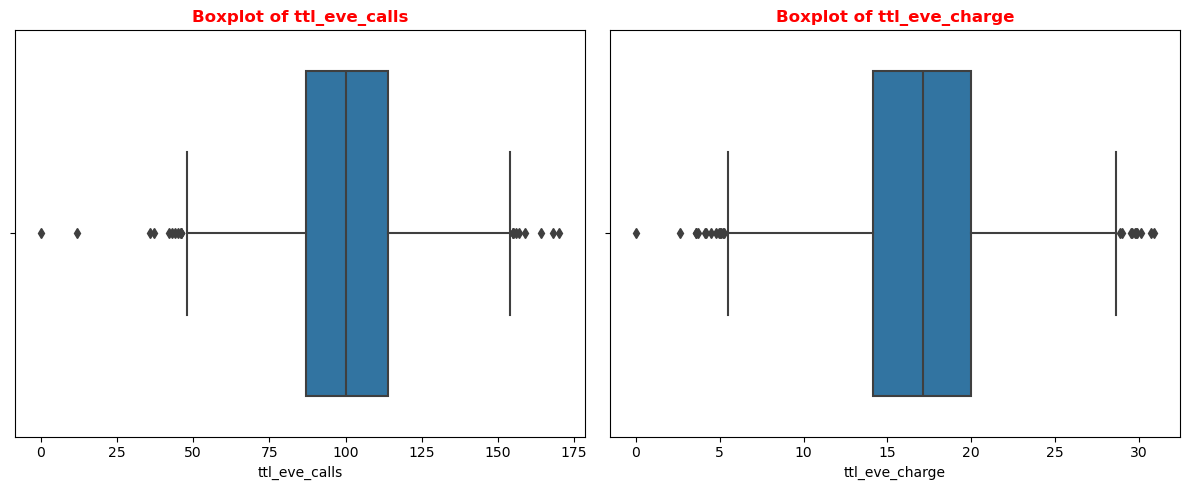

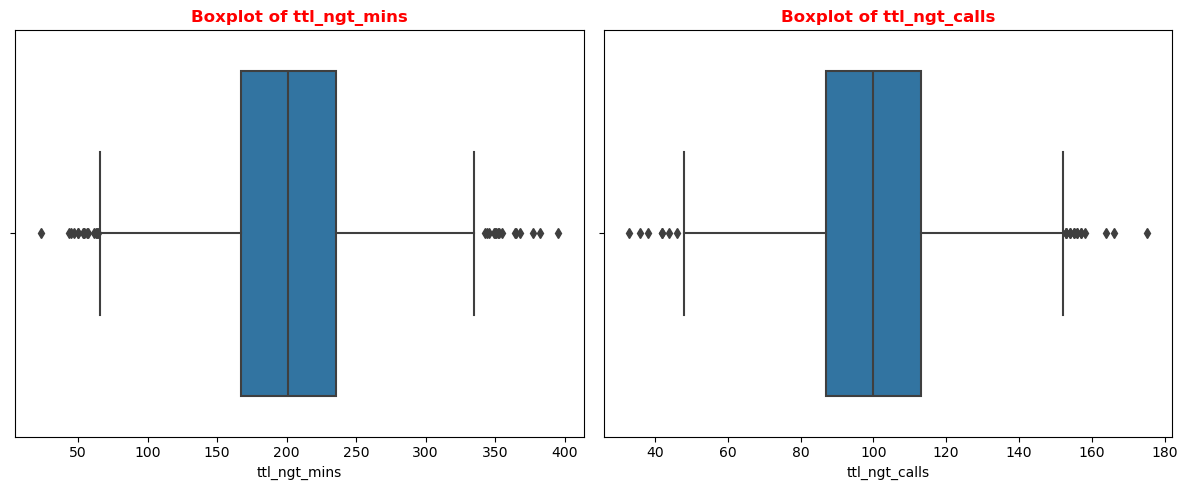

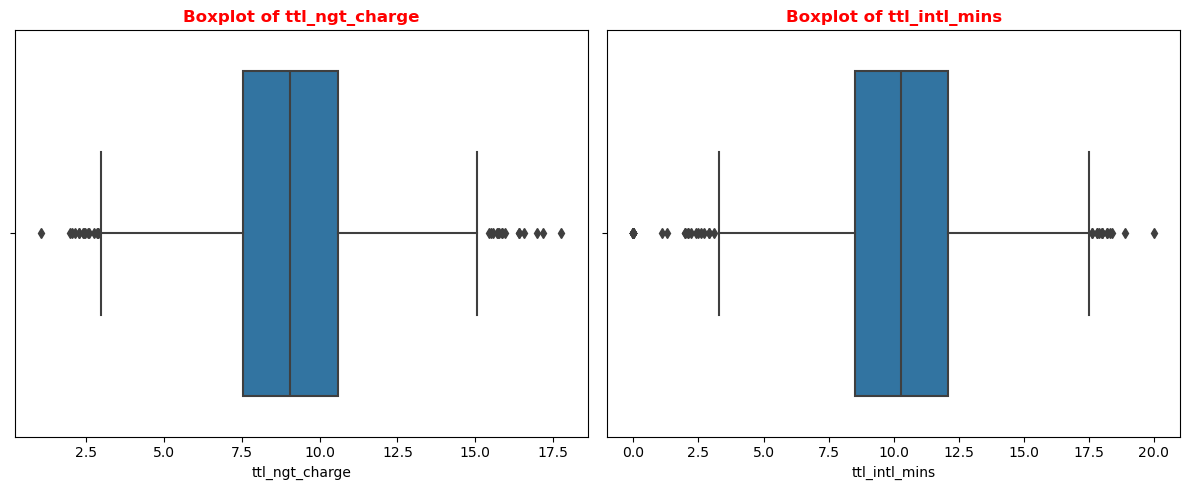

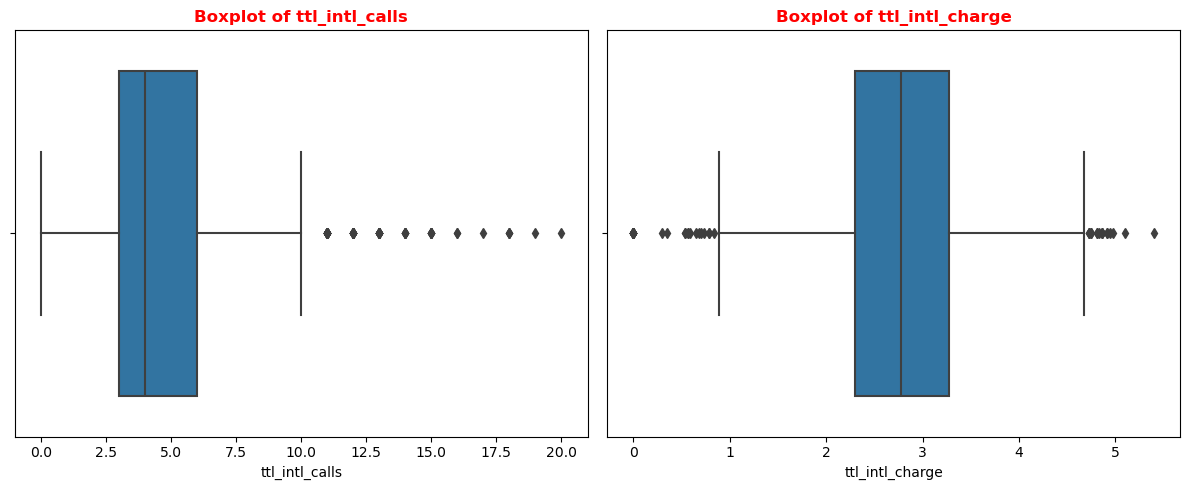

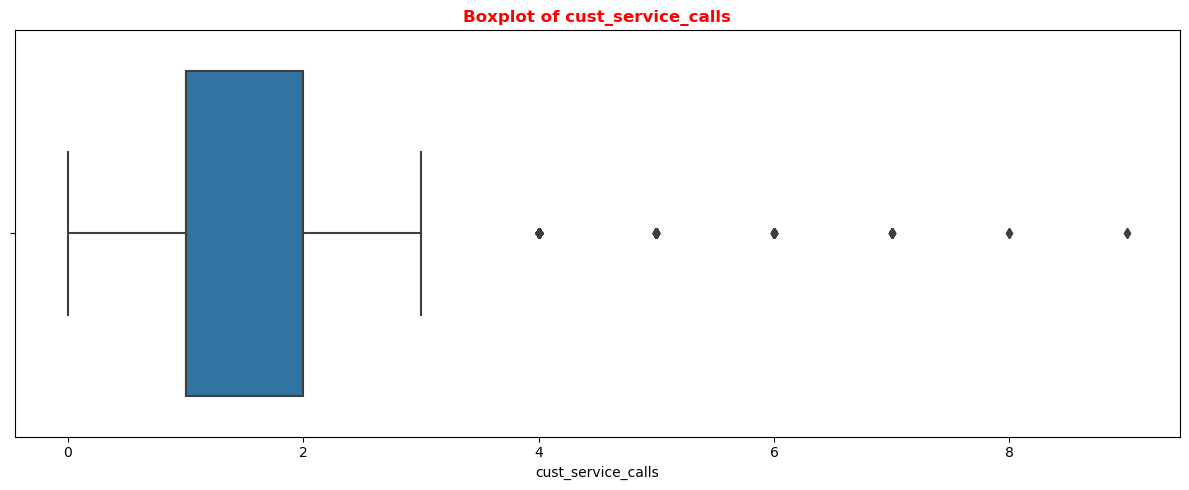

In [18]:
num_cols_list = num_cols.columns.tolist()
n = len(num_cols_list)
for i in range(0, n, 2):
    cols_pair = num_cols_list[i:i+2] 
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(12, 5))
    axes = np.atleast_1d(axes)
    for j, col in enumerate(cols_pair):
        sns.boxplot(x=num_cols[col], ax=axes[j])
        axes[j].set_title(f'Boxplot of {col}', fontweight='bold', color='red')
    plt.tight_layout()
    plt.show()

#### Decision to Retain Outliers
Outliers were detected in several numeric variables, but I have retained them because they reflect meaningful customer behavior rather than errors. Since this data is collected through **Network Management Systems (NMS)** using automated **counters**, it is **reliable** and **free** from manual entry **errors**. High call minutes, charges, or frequent service calls can indicate genuine patterns such as heavy users or dissatisfied customers, which are critical for understanding churn. Moreover, extreme values are expected in telecom usage data and often represent real-world customer segments, such as business users or international callers, making them important to preserve in the analysis.

### 3.2: Feature Engineering

Engineered features will help us improve our model metrics as it defines relationships which would be missed by the models. Additional, we can check and quantify the performance of the model with and without engineered features

#### 3.2.1: Creating Additional features

In [19]:
#creating a copy of original dataframe
df1 = df.copy()
df1.head()

,state,acc_length,area_code,intl_plan,vmail_plan,num_vm_msgs,ttl_day_mins,ttl_day_calls,ttl_day_charge,ttl_eve_mins,ttl_eve_calls,ttl_eve_charge,ttl_ngt_mins,ttl_ngt_calls,ttl_ngt_charge,ttl_intl_mins,ttl_intl_calls,ttl_intl_charge,cust_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,Not Churned
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,Not Churned
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,Not Churned
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,Not Churned
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,Not Churned


In [20]:
#checking shape before
df1.shape

(3333, 20)

In [21]:
#Combining related features
df1['total_calls'] = (df1['ttl_day_calls'] + df1['ttl_eve_calls'] + df1['ttl_ngt_calls'] + df1['ttl_intl_calls'])
df1['total_mins'] = (df1['ttl_day_mins'] + df1['ttl_eve_mins'] + df1['ttl_ngt_mins'] + df1['ttl_intl_mins'])
df1['total_charge'] = (df1['ttl_day_charge'] + df1['ttl_eve_charge'] + df1['ttl_ngt_charge'] + df1['ttl_intl_charge'])
df1.shape

(3333, 23)

In [22]:
# Creating ratio features
df1['day_call_ratio'] = df1['ttl_day_calls'] / df1['total_calls'].replace(0, 1)
df1['intl_ratio'] = df1['ttl_intl_mins'] / df1['total_mins'].replace(0, 1)
df1.shape

(3333, 25)

#### 3.2.3: Saving the cleaned dataset with additional features

In [23]:
df1.to_csv("cleaned_data/data_final.csv", index=False)

## 4: Exploratory Data Analysis

In [24]:
#importing the extended dataset
data = pd.read_csv('cleaned_data/data_final.csv',dtype={"area_code": str})
data.head()

,state,acc_length,area_code,intl_plan,vmail_plan,num_vm_msgs,ttl_day_mins,ttl_day_calls,ttl_day_charge,ttl_eve_mins,...,ttl_intl_mins,ttl_intl_calls,ttl_intl_charge,cust_service_calls,churn,total_calls,total_mins,total_charge,day_call_ratio,intl_ratio
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,10.0,3,2.70,1,Not Churned,303,717.2,75.56,0.363036,0.013943
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,13.7,3,3.70,1,Not Churned,332,625.2,59.24,0.370482,0.021913
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,12.2,5,3.29,0,Not Churned,333,539.4,62.29,0.342342,0.022618
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,6.6,7,1.78,2,Not Churned,255,564.8,66.80,0.278431,0.011686
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,10.1,3,2.73,3,Not Churned,359,512.0,52.09,0.314763,0.019727


In [25]:
#checking shape
data.shape

(3333, 25)

### 4.1: Univariate Analysis

#### 4.1.1: Churn distribution

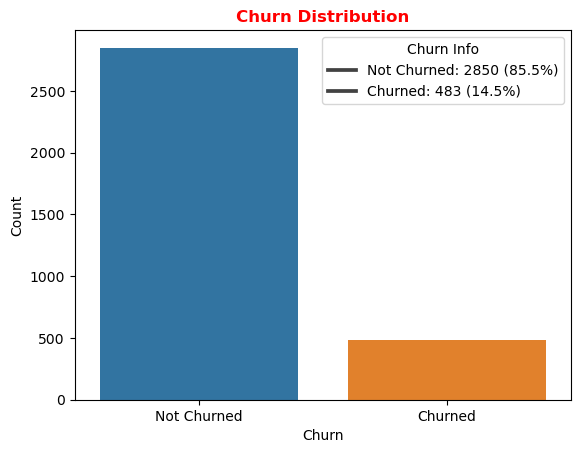

In [26]:
churn_cnts = data['churn'].value_counts()
labels = data['churn'].value_counts(normalize=True)*100
sns.barplot(x=churn_cnts.index, y=churn_cnts.values)
plt.title("Churn Distribution", fontweight='bold',color='red')
legend_labels = [
    f"{idx}: {count} ({perc:.1f}%)"
    for idx, count, perc in zip(churn_cnts.index, churn_cnts.values, labels)
]
plt.legend(title="Churn Info", labels=legend_labels)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

**From the barplot, we can see there is class imbalance in our target variable as `85%` of the dataset did `not churn` while `14.5%` customers did `churn`.**

#### 4.1.2: How often customers call Support

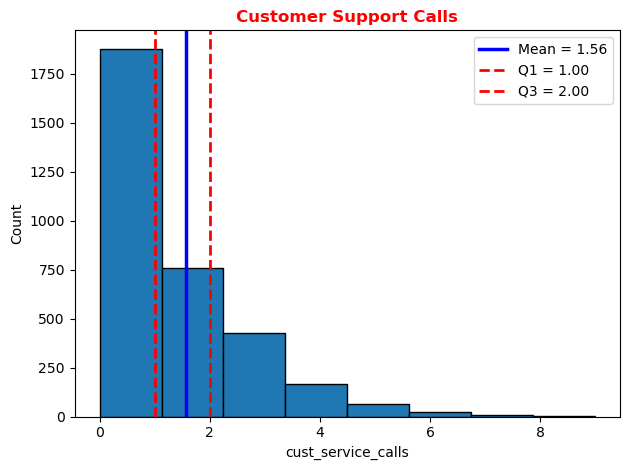

In [27]:
# calculating statistics
mean_calls = data['cust_service_calls'].mean()
q1 = data['cust_service_calls'].quantile(0.25)
q3 = data['cust_service_calls'].quantile(0.75)
iqr = q3 - q1

#plotting the graph
plt.hist(data['cust_service_calls'], bins=8, edgecolor='black')
plt.title("Customer Support Calls", fontweight='bold', color='red')
plt.xlabel("cust_service_calls")
plt.ylabel("Count")

#adding mean and iqr lines
plt.axvline(mean_calls, color='blue', linestyle='-', linewidth=2.5, label=f"Mean = {mean_calls:.2f}")
plt.axvline(q1, color='red', linestyle='--', linewidth=2, label=f"Q1 = {q1:.2f}")
plt.axvline(q3, color='red', linestyle='--', linewidth=2, label=f"Q3 = {q3:.2f}")

#formating
plt.legend()
plt.tight_layout()
plt.show();

**Majority of customers in the dataset `did not place` customer support calls since `more` than `two-thirds` of the dataset have `zero` calls. The customers who made calls average atleast `one phone call` with the highest being `8` calls. The distribution is `skewed` to the left showing that high number of support calls are `rare`.**

#### 4.1.3: What is the proportion of customers on International Plan

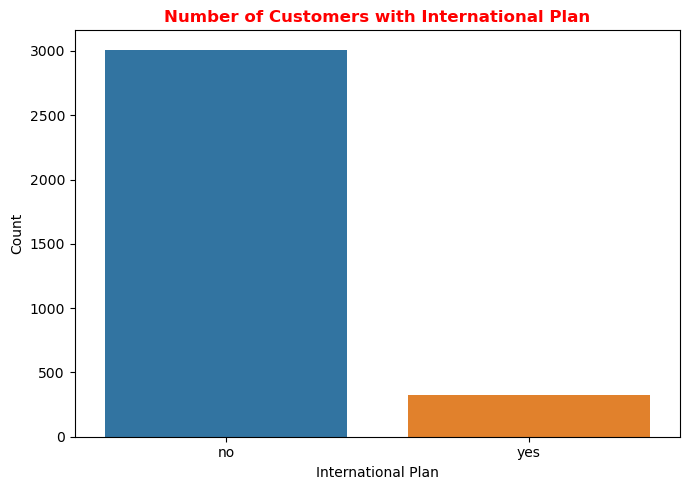

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(x='intl_plan', data=data)
plt.title("Number of Customers with International Plan", fontweight='bold', color='red')
plt.xlabel("International Plan")
plt.ylabel("Count")
plt.tight_layout()
plt.show();

**From our dataset,only about `10%` of customers have subscribed to an `international plan package` while the majority have no international plan**

#### 4.1.4: What is the distribution of Numerical features

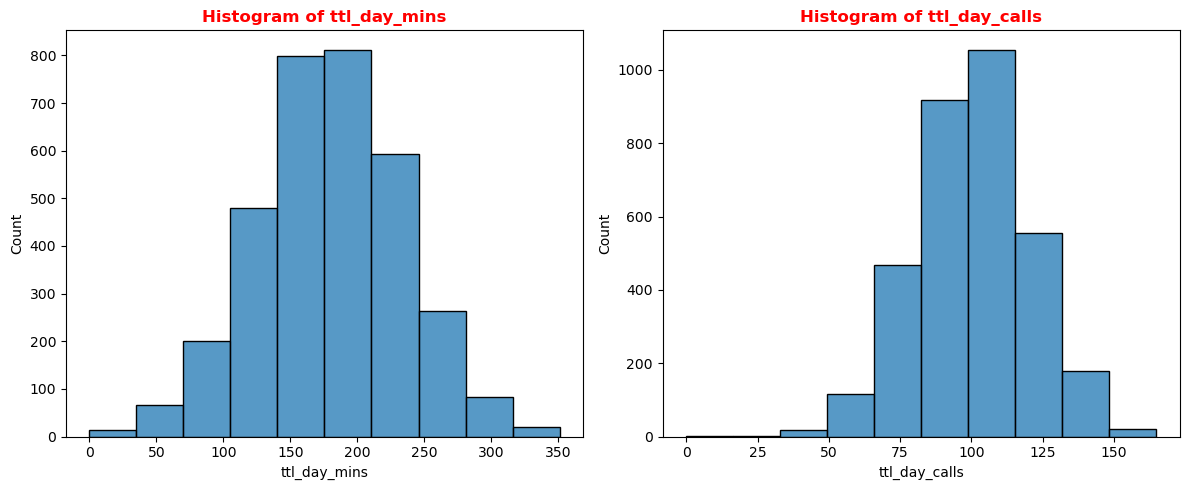

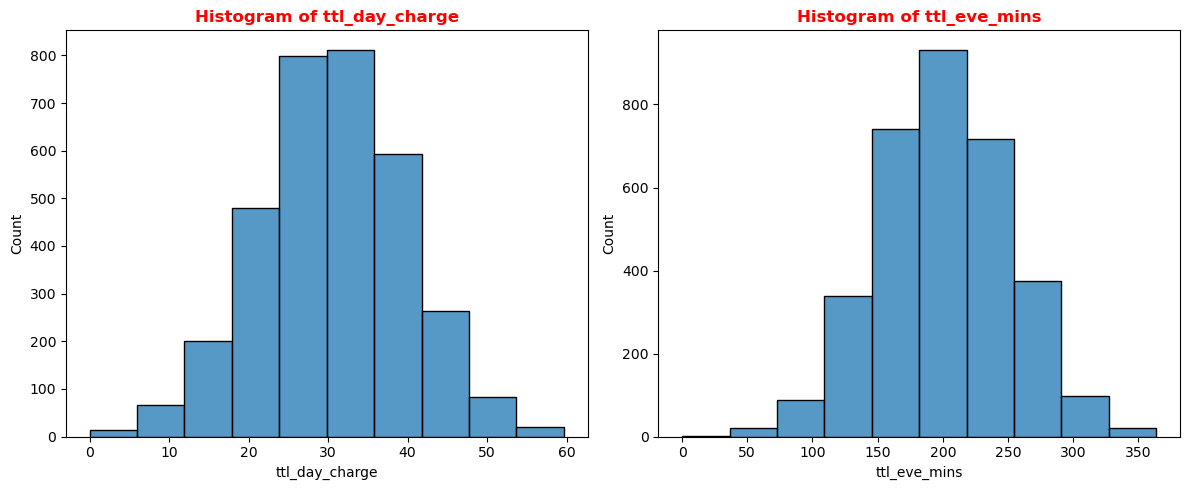

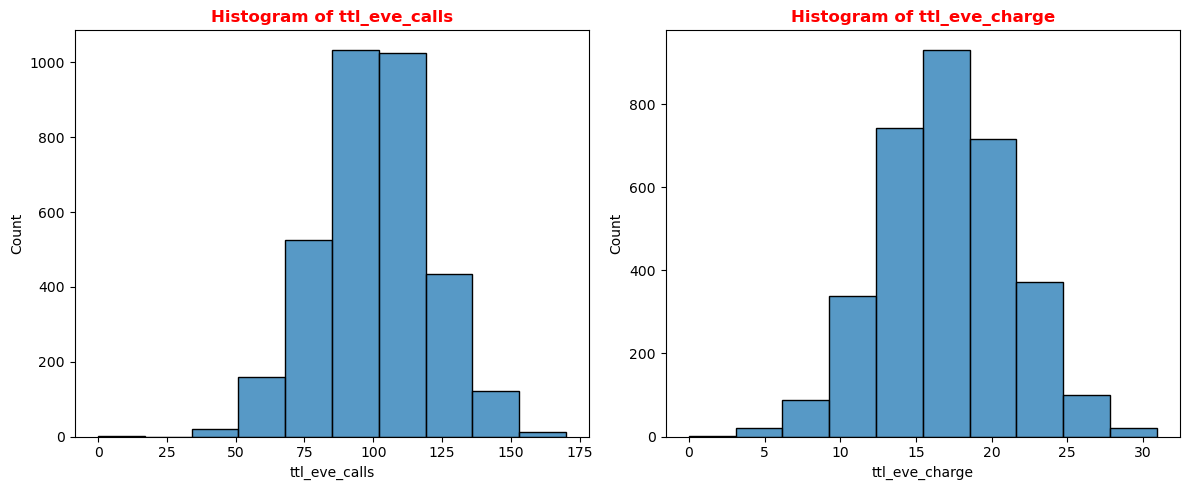

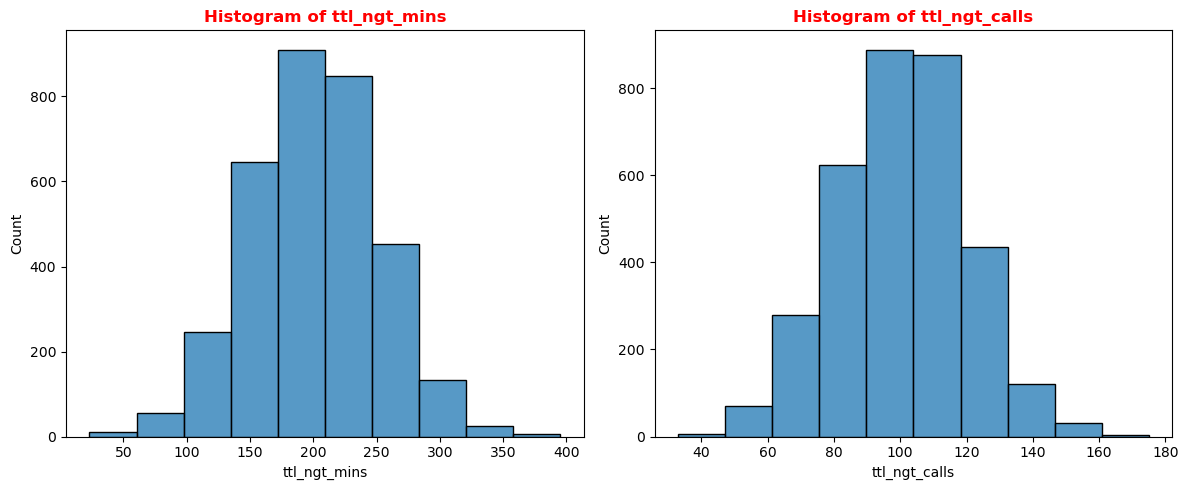

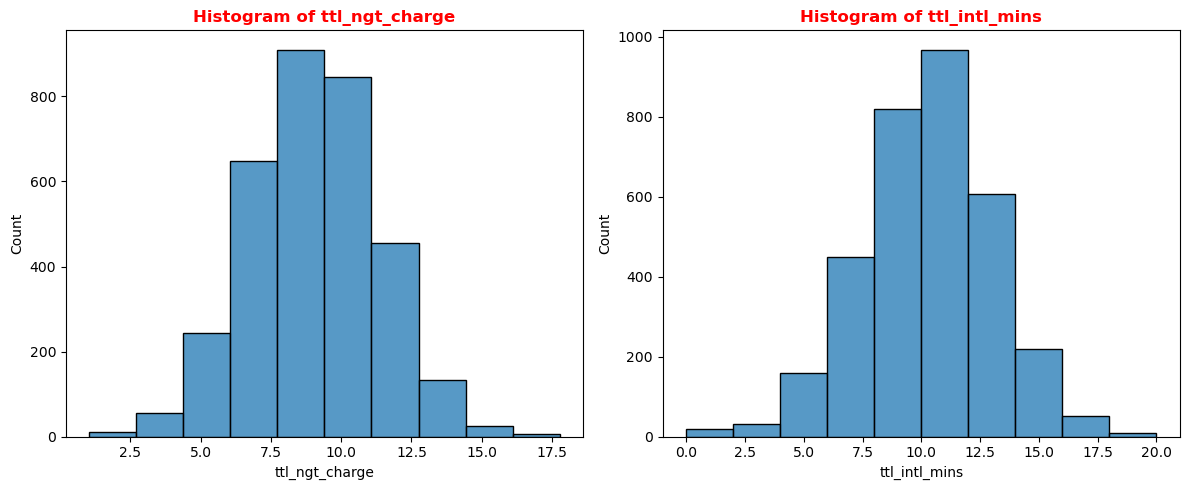

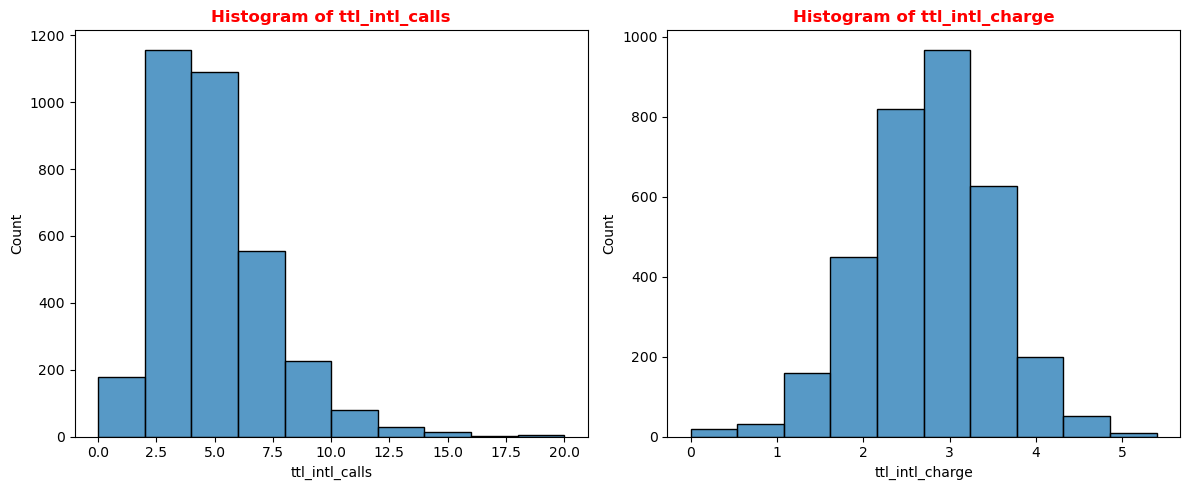

In [29]:
numeric_cols = ['ttl_day_mins',
                'ttl_day_calls',
                'ttl_day_charge',
                'ttl_eve_mins',
                'ttl_eve_calls',
                'ttl_eve_charge',
                'ttl_ngt_mins',
                'ttl_ngt_calls',
                'ttl_ngt_charge',
                'ttl_intl_mins',
                'ttl_intl_calls',
                'ttl_intl_charge']

n = len(numeric_cols)
for i in range(0, n, 2):
    cols_pair = numeric_cols[i:i+2] 
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(12, 5))
    axes = np.atleast_1d(axes)
    
    for j, col in enumerate(cols_pair):
        sns.histplot(data[col], bins=10, kde=False, edgecolor='black', ax=axes[j])
        axes[j].set_title(f'Histogram of {col}', fontweight='bold', color='red')
        axes[j].set_xlabel(col)
        axes[j].set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()

##### Distribution of Numeric Variables
--- The histograms show the distribution of telecom usage variables such as `total minutes`, `number of calls`, and `charges` across different time periods (`day`, `evening`, `night`, and `international`).  

--- Most variables appear roughly **normally distributed**, with `call totals` being **narrower** while `minutes` and `charges` show **wider** variance.  

--- Worth noting is that `charges` follow the **same distribution** as their corresponding `minutes` since they are directly derived from call durations.  

--- Overall, the distributions look well behaved, with most values falling within reasonable ranges for telecom usage.  


### 4.2: Bivariate analysis

#### 4.2.1: Do customers with international plan churn more?

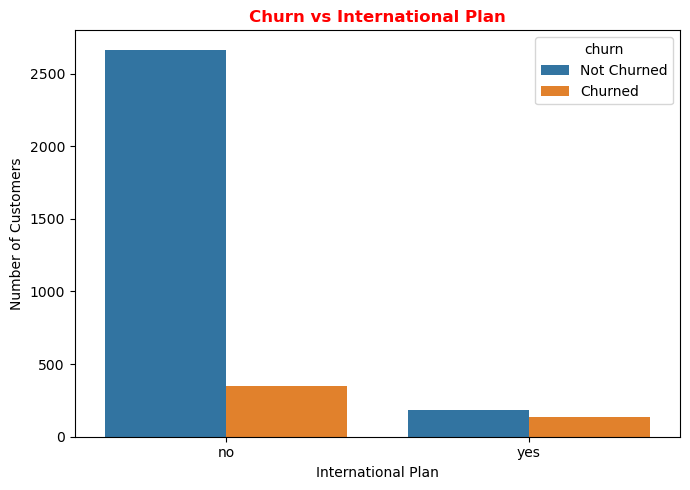

In [38]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x="intl_plan", hue="churn")
plt.title("Churn vs International Plan", fontweight='bold', color='red')
plt.xlabel("International Plan")   
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show();

#### 4.2.2: What is the distribution of Numerical features

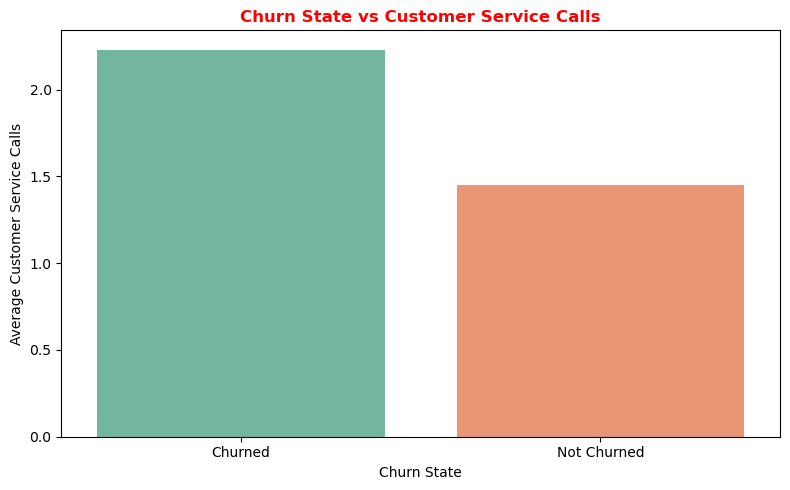

In [43]:
churn_rate = data.groupby("churn")["cust_service_calls"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=churn_rate, x="churn", y="cust_service_calls", palette="Set2")
plt.title("Churn State vs Customer Service Calls", fontweight='bold', color='red')
plt.xlabel("Churn State")
plt.ylabel("Average Customer Service Calls")
plt.tight_layout()
plt.show();

#### 4.2.3: What is the Churn Distribution by Area Code?

<Figure size 800x500 with 0 Axes>

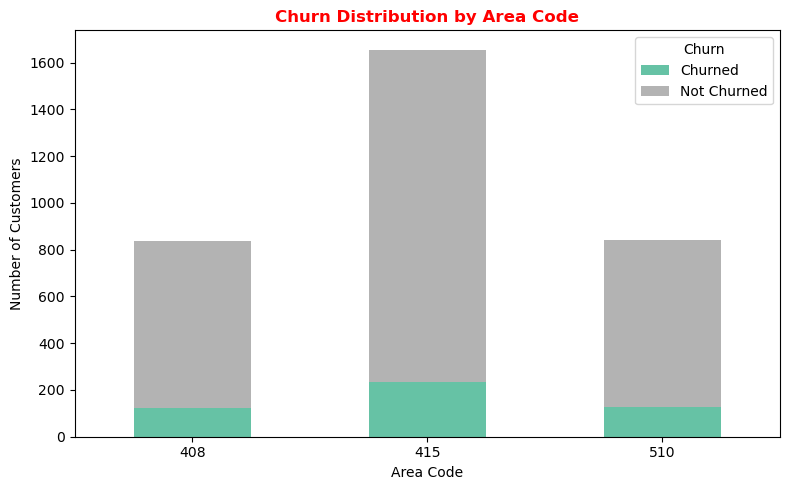

In [49]:
churn_area = pd.crosstab(data['area_code'],data['churn'])
plt.figure(figsize=(8,5))
churn_area.plot(kind="bar", stacked=True, colormap='Set2', figsize=(8,5))
plt.title("Churn Distribution by Area Code", fontweight='bold', color='red')
plt.xlabel("Area Code")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.tight_layout()
plt.show();

#### 4.2.4: What is the distribution of Numerical features

### 4.3:  Multivariate analysis

#### 4.3.1: What is the distribution of Numerical features

In [31]:
#### 4.3.2: What is the distribution of Numerical features

In [32]:
#### 4.3.3: What is the distribution of Numerical features

In [33]:
#### 4.3.4: What is the distribution of Numerical features

## 5: Inferential Analysis

Pearson Correlation Test, T test, One_Way Anova or Chi_test

In [ ]:
Test do customers with voice plan likely to churn

## Modeling

### data Preprocessing

follow from mwalimu

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               3333 non-null   object 
 1   acc_length          3333 non-null   int64  
 2   area_code           3333 non-null   object 
 3   intl_plan           3333 non-null   object 
 4   vmail_plan          3333 non-null   object 
 5   num_vm_msgs         3333 non-null   int64  
 6   ttl_day_mins        3333 non-null   float64
 7   ttl_day_calls       3333 non-null   int64  
 8   ttl_day_charge      3333 non-null   float64
 9   ttl_eve_mins        3333 non-null   float64
 10  ttl_eve_calls       3333 non-null   int64  
 11  ttl_eve_charge      3333 non-null   float64
 12  ttl_ngt_mins        3333 non-null   float64
 13  ttl_ngt_calls       3333 non-null   int64  
 14  ttl_ngt_charge      3333 non-null   float64
 15  ttl_intl_mins       3333 non-null   float64
 16  ttl_in